In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
dataset = pd.read_csv('diabetes.csv')
dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

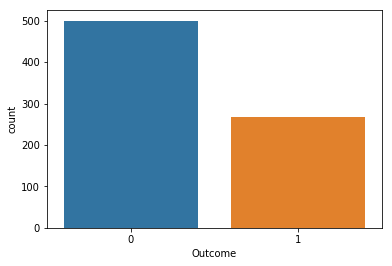

In [5]:
sns.countplot('Outcome',data=dataset) #1 means diabetes 0 means no diabetes

In [6]:
YesDiabetes=dataset[dataset['Outcome']==1]
NoDiabetes=dataset[dataset['Outcome']==0]
print(YesDiabetes.shape,NoDiabetes.shape)

((268, 9), (500, 9))


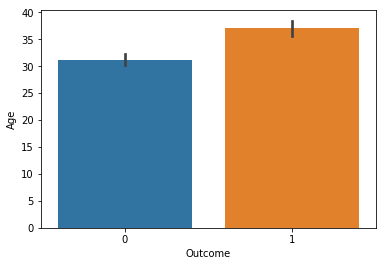

In [7]:
sns.barplot(x='Outcome',y='Age',data=dataset)

In [8]:
data_corelation=dataset.corr()
data_corelation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


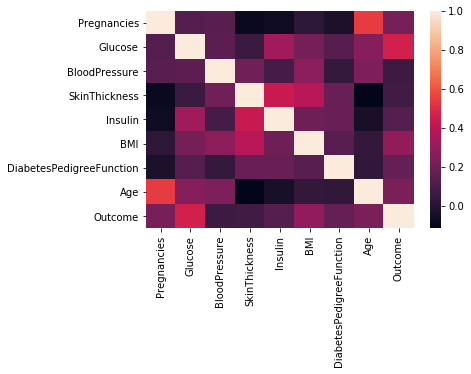

In [9]:
sns.heatmap(data_corelation)

In [10]:
x = dataset.iloc[:,0:8].values
y = dataset.iloc[:,8:9].values

In [11]:
print("Values of x:", x )

('Values of x:', array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]]))


In [12]:
print(y)

[[1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]


In [13]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
x = Sc.fit_transform(x)
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.1)

In [15]:
print(X_train.shape)

(691, 8)


In [16]:
print(X_test.shape)

(77, 8)


In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(16,input_dim=8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

Using TensorFlow backend.


In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
history=model.fit(X_train, Y_train, epochs=25, batch_size=70, verbose=1,validation_split=0.1)


Train on 621 samples, validate on 70 samples
Epoch 1/25
621/621 [==============================] - 0s 266us/step - loss: 0.7216 - accuracy: 0.4026 - val_loss: 0.6931 - val_accuracy: 0.5429
Epoch 2/25
621/621 [==============================] - 0s 34us/step - loss: 0.7101 - accuracy: 0.4283 - val_loss: 0.6819 - val_accuracy: 0.5714
Epoch 3/25
621/621 [==============================] - 0s 47us/step - loss: 0.6999 - accuracy: 0.4670 - val_loss: 0.6720 - val_accuracy: 0.6286
Epoch 4/25
621/621 [==============================] - 0s 38us/step - loss: 0.6906 - accuracy: 0.5105 - val_loss: 0.6625 - val_accuracy: 0.6714
Epoch 5/25
621/621 [==============================] - 0s 56us/step - loss: 0.6813 - accuracy: 0.5507 - val_loss: 0.6533 - val_accuracy: 0.6857
Epoch 6/25
621/621 [==============================] - 0s 35us/step - loss: 0.6726 - accuracy: 0.5878 - val_loss: 0.6436 - val_accuracy: 0.7286
Epoch 7/25
621/621 [==============================] - 0s 40us/step - loss: 0.6637 - accuracy: 0

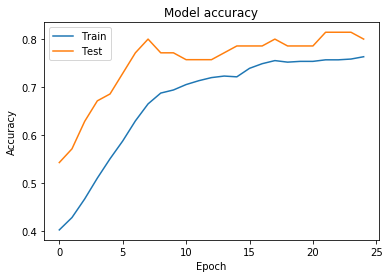

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

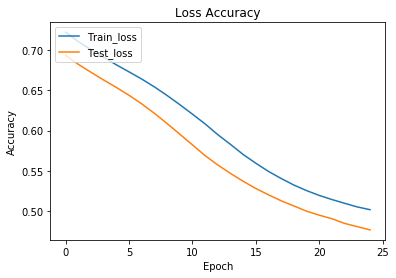

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train_loss', 'Test_loss'], loc='upper left')
plt.show()

In [22]:
scores=model.evaluate(X_train, Y_train)
print(scores)

691/691 [==============================] - 0s 40us/step
[0.49749645168115364, 0.7655571699142456]


In [23]:
from sklearn.metrics import accuracy_score

In [24]:
pred=model.predict(X_test)
print("The size of testing dataset is "+ str(pred.shape[0]))
print(pred)

The size of testing dataset is 77
[[0.6927638 ]
 [0.11594468]
 [0.73832005]
 [0.33601815]
 [0.10857546]
 [0.14787191]
 [0.18220809]
 [0.40239853]
 [0.30175278]
 [0.1250298 ]
 [0.05805826]
 [0.29153115]
 [0.7014737 ]
 [0.05562013]
 [0.43923512]
 [0.3698994 ]
 [0.08570653]
 [0.11417565]
 [0.17886275]
 [0.9519137 ]
 [0.19479528]
 [0.0945113 ]
 [0.3241311 ]
 [0.47947624]
 [0.10719571]
 [0.3106289 ]
 [0.632807  ]
 [0.07802677]
 [0.13593969]
 [0.67036974]
 [0.27680227]
 [0.4436515 ]
 [0.39214122]
 [0.06599608]
 [0.33802468]
 [0.41874897]
 [0.47294933]
 [0.544579  ]
 [0.37593564]
 [0.80669224]
 [0.27549875]
 [0.16676939]
 [0.44409093]
 [0.11193052]
 [0.33465672]
 [0.15155488]
 [0.80362725]
 [0.36191744]
 [0.11923203]
 [0.42390344]
 [0.48733556]
 [0.45299467]
 [0.5005187 ]
 [0.21726778]
 [0.12703887]
 [0.37485713]
 [0.329273  ]
 [0.73555994]
 [0.34328434]
 [0.7462367 ]
 [0.1963231 ]
 [0.754377  ]
 [0.5197982 ]
 [0.01900485]
 [0.63161635]
 [0.07983673]
 [0.12723833]
 [0.71474564]
 [0.17702195]


In [25]:
rounded = [round(x[0]) for x in pred]
print("predicted value :",rounded)
test = Y_test

('predicted value :', [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0])


In [26]:
rounded_test=[round(x[0]) for x in test]
print("The test split values :",rounded_test)
a=accuracy_score(rounded,rounded_test)

('The test split values :', [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0])


In [27]:
print('Accuracy is:', a*100)

('Accuracy is:', 71.42857142857143)


In [28]:
C_matrix = confusion_matrix(Y_test, rounded)
C_matrix

array([[43,  7],
       [15, 12]])

In [29]:
print(classification_report(Y_test, rounded))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80        50
           1       0.63      0.44      0.52        27

   micro avg       0.71      0.71      0.71        77
   macro avg       0.69      0.65      0.66        77
weighted avg       0.70      0.71      0.70        77



In [30]:
model.save('diabetes_neural_network.h5')

In [31]:
from keras.models import load_model
new_model=load_model('diabetes_neural_network.h5')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 289
Trainable params: 289
Non-trainable params: 0
_________________________________________________________________


In [41]:
userinput = list(map(float, input("Enter Your Medical Report in a given sequence \n 1.Pregnancy \n 2.Glucose \n 3.Blood pressure \n 4.Skin Thickness \n 5.Insulin \n 6.BMI \n 7.DiabetesPedigreeFunction \n 8.Age \n Your Medical Report:  ").split())) 
print("You have provided your medical report as follow: ", userinput)

Enter Your Medical Report in a given sequence 
 1.Pregnancy 
 2.Glucose 
 3.Blood pressure 
 4.Skin Thickness 
 5.Insulin 
 6.BMI 
 7.DiabetesPedigreeFunction 
 8.Age 
 Your Medical Report:  "100000 10000 100000 100000 100000 10000 10000 1000000"
('You have provided your medical report as follow: ', [100000.0, 10000.0, 100000.0, 100000.0, 100000.0, 10000.0, 10000.0, 1000000.0])


In [63]:
userinput=[[5005000,2005150000,1002020,5020,605050,25455,1.50000000,51]] #If we want to take the data manually
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
to_test = Sc.fit_transform(userinput)
print(to_test)

[[0. 0. 0. 0. 0. 0. 0. 0.]]


In [64]:
pred=model.predict(to_test)
print("The size of testing dataset is "+ str(pred.shape[0]))
print(pred)

The size of testing dataset is 1
[[0.39038047]]


In [65]:
print("The model has analyzed your medical report...")
# for num in pred:
    
#     if num >=0.5:
#         print(" \n You report has shown Diabetes Positive ")
#     else:
#         print(" You report has shown Diabetes Negative ")
if pred > 0.5:
    print("You report has shown Diabetes Positive ")
else:
    print(" You report has shown Diabetes Negative")

The model has analyzed your medical report...
 You report has shown Diabetes Negative
